<a href="https://colab.research.google.com/github/aebrahimi66/mnist/blob/main/problem_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *

In [6]:
path = untar_data(URLs.MNIST_SAMPLE)

In [7]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid')]

In [9]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [10]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [15]:
im3_path = threes[33]
im3 = Image.open(im3_path)
im3

In [12]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [13]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [19]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,4,104,229,203,13,0,0,0,0,0
1,0,0,0,0,0,13,57,157,179,252,252,252,207,169,82,32,0,0
2,0,0,0,0,60,209,252,252,253,252,252,252,253,252,252,177,0,0
3,0,0,0,0,141,252,252,252,253,177,190,139,203,252,252,252,101,0
4,0,0,0,0,179,253,231,175,51,0,0,0,0,108,253,253,176,0
5,0,0,0,0,10,84,19,0,0,0,0,0,7,101,252,252,225,0
6,0,0,0,0,0,0,0,0,0,0,0,38,154,252,252,252,137,0
7,0,0,0,0,0,0,0,0,0,26,113,225,253,252,252,202,13,0
8,0,0,0,0,0,7,29,128,204,253,253,253,255,253,253,40,0,0
9,0,0,0,0,19,187,252,252,253,252,252,252,253,252,252,165,0,0


In [21]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

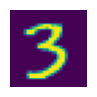

In [22]:
show_image(three_tensors[1]);

In [23]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape



torch.Size([6131, 28, 28])

In [24]:
len(stacked_threes.shape)

3

In [25]:
stacked_threes.ndim

3

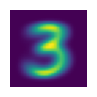

In [26]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

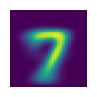

In [27]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

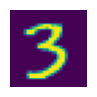

In [28]:
a_3 = stacked_threes[1]
show_image(a_3);

In [29]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [30]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [31]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))